Make sure you have GPU access enabled by going to Runtime -> Change Runtime Type -> Hardware accelerator and selecting GPU

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install "cellpose==2.3.2"
!pip install torch torchvision torchaudio
!pip install omnipose
!pip install "opencv-python-headless<4.3"
exit(0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for omnipose: filename=omnipose-1.0.6-py3-none-any.whl size=345104 sha256=e7545943535ca288e1d7eb1279941b592d4d20679eccbd905d33c54cae15e948
  Stored in directory: /root/.cache/pip/wheels/c1/c1/11/6b60ad9e07f9ac4c6678e493d585aa13c2bd85303c0

In [ ]:
import numpy as np
import pandas as pd
import time, os, sys, random
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
import shutil

#from tifffile import imread, imsave

print ("Downloading Models")
from cellpose import models,core

model_list = models.MODEL_NAMES

#Enable Logging
from cellpose.io import logger_setup
logger_setup()

creating new log file


(<Logger cellpose.io (WARNING)>, PosixPath('/root/.cellpose/run.log'))

In [ ]:
import pandas as pd
metadata = pd.read_csv('/content/gdrive/MyDrive/F2024/Applied Data Science/Project 2/metadata_BR00116991.csv')

In [ ]:
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

In [ ]:
# Check GPU Access
use_GPU = core.use_gpu()
if not use_GPU:
    print(f"{BOLD}{UNDERLINE}No GPU access detected. Expect slower performance.{END}")
else:
    print(f"{BOLD}{UNDERLINE}GPU access detected. You can proceed.{END}")
    !nvidia-smi

GPU access detected. You can proceed.
Tue Oct 22 19:18:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0              27W /  70W |    105MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------

In [ ]:
# Set Input and Output Directories
input_dir = "/content/gdrive/MyDrive/F2024/Applied Data Science/Project 2/downsampled_data"
save_dir = os.path.join(input_dir, "Masks/")

# this is commented out for now becuase i want to keep the same directory
# if os.path.exists(save_dir):
#     print("Existing Mask Directory found. Deleting it.")
#     shutil.rmtree(save_dir)
# os.makedirs(save_dir)

In [ ]:
# Load Image Files

image_format = "tiff"
files = [os.path.join(r, f) for r, _, f in os.walk(input_dir) for f in f if f.endswith(image_format)]
if not files:
    print("No images found. Check if the folder has images.")
else:
    print(f"Number of images loaded: {len(files)}")

Number of images loaded: 2867


Number of images loaded: 2867
r04c16f05_median_aggregated.tiff has 2 dimensions/s


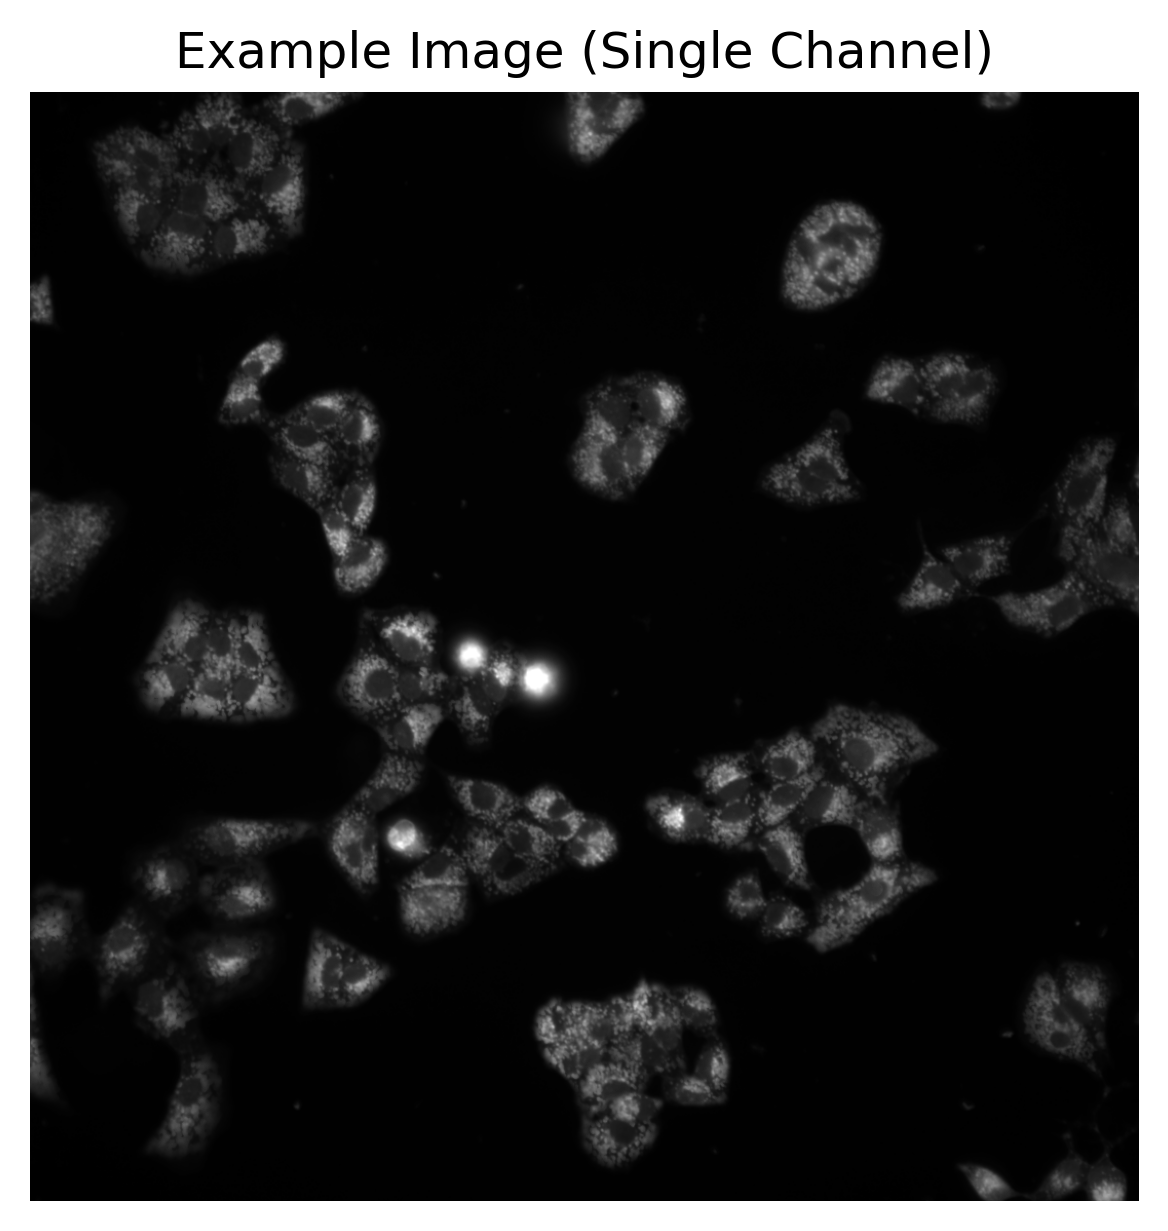

In [ ]:
# Step 5: Read and Load Images
imgs = [skimage.io.imread(f) for f in files]

nimg = len(imgs)
print(f"Number of images loaded: {nimg}")

# Display an Example Image
random_idx = random.choice(range(nimg))
example_image = imgs[random_idx]
n_dim = example_image.ndim

file_name = os.path.basename(files[random_idx])
print(f"{file_name} has {n_dim} dimensions/s")

if n_dim == 3:
    channels = example_image.shape[2]
    fig, axs = plt.subplots(1, channels, figsize=(12, 5))
    for channel in range(channels):
        axs[channel].imshow(example_image[:, :, channel])
        axs[channel].set_title(f'Channel {channel + 1}', size=15)
        axs[channel].axis('off')
    plt.tight_layout()
elif n_dim == 2:
    plt.imshow(example_image, cmap='gray')
    plt.title("Example Image (Single Channel)")
    plt.axis('off')
else:
    print("Unexpected dimensions for image.")

In [ ]:
# Step 6: Choose Cellpose Model
model_type = 'cyto2'  # Default model; adjust if needed
# Initialize Cellpose Model
model = models.CellposeModel(gpu=use_GPU, model_type=model_type, net_avg=True)


100%|██████████| 25.3M/25.3M [00:02<00:00, 9.63MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 9.79MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 9.70MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 9.89MB/s]
/usr/local/lib/python3.10/dist-packages/cellpose/resnet_torch.py:225: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` fo

In [ ]:
diameter = None  # Set to None to auto-estimate cell size
flow_threshold = 0.6
cellprob_threshold = -5
segment_channel = 0  # Set to 0 for grayscale images
channels = [segment_channel,0]

Image: r12c17f08_median_aggregated


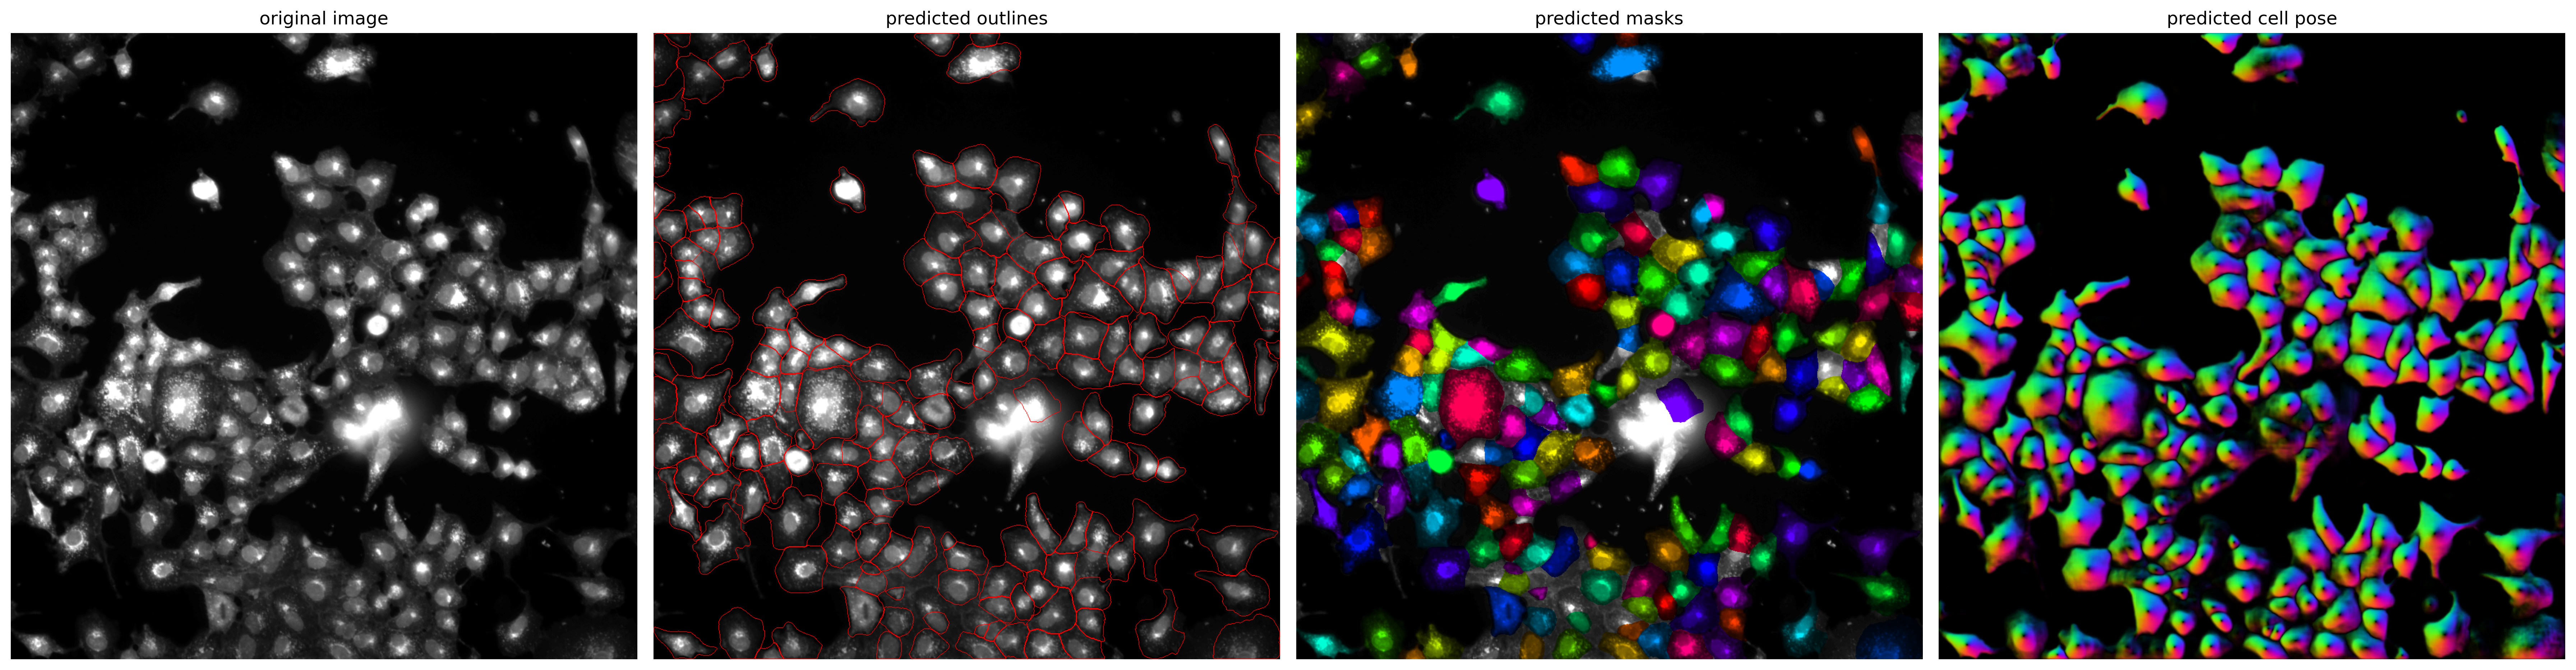

In [ ]:
from skimage.util import img_as_ubyte

Image_Number =  2 # enter a number
Image_Number-=1 #indexing starts at zero
#print(Image_Number)

Diameter = 0
flow_threshold = 0.6

cellprob_threshold = -5 #min:-6, max:6, step:1


diameter=Diameter
if diameter == 0:
  diameter = None
if Image_Number == -1:
  Image_Number=0
  #print("Image_Number is set to zero, opening first image.")
try:
    image = imgs[Image_Number]
except IndexError as i:
   print("Image number does not exist",i)
   print("Actual no of images in folder: ",len(imgs))
print("Image: %s" %(os.path.splitext(os.path.basename(files[Image_Number]))[0]))
img1=imgs[Image_Number]

import cv2

masks, flows, styles = model.eval(img1, diameter=diameter, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold, channels=channels)

# DISPLAY RESULTS
from cellpose import plot
maski = masks
flowi = flows[0]

#convert to 8-bit if not so it can display properly in the graph
if img1.dtype!='uint8':
  img1=img_as_ubyte(img1)

fig = plt.figure(figsize=(24,8))
#if len(img1.shape)==3:
  #img_ch_plot = img1[:,:,segment_channel]img_ch_plot
plot.show_segmentation(fig, img1 , maski, flowi, channels=channels)
plt.tight_layout()
plt.show()

In [ ]:
mask_dir_path = '/content/gdrive/MyDrive/F2024/Applied Data Science/Project 2/downsampled_data/Masks'
mask_files = os.listdir(mask_dir_path)

In [ ]:
# Run Cellpose on folder of images

save_flow = False

print("Running segmentation on channel %s" %(segment_channel))
print("Using the model: ",model_type)
if diameter is None:
  print("Diameter will be estimated from the image/s")
else:
  print(f"Cellpose will use a diameter of {diameter}")

print(f"Using a flow threshold of: {flow_threshold} and a cell probability threshold of: {cellprob_threshold}")

#save images in folder with the diameter value used in cellpose
print("Segmentation Done. Saving Masks and flows now")
print("Save Directory is: ",save_dir)
if (not os.path.exists(save_dir)):
    os.mkdir(save_dir)

if save_flow:
  print("Saving Flow")
  flows_save_dir=save_dir+"flows"+os.sep
  print("Save Directory for flows is: ",flows_save_dir)
  if (not os.path.exists(flows_save_dir)):
      os.mkdir(flows_save_dir)

for img_idx, img in enumerate(imgs):
    file_name=os.path.splitext(os.path.basename(files[img_idx]))[0]

    mask_output_filename = "MASK_" + file_name + ".tif"
    if mask_output_filename in mask_files:
        print(f"Skipping {file_name} because the mask already exists.")
        continue  # Skip to the next image

    print("\nSegmenting: ",file_name)
    #mask, flow, style, diam = model.eval(img, diameter=diameter, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold, channels=channels)
    mask, flow, style = model.eval(img, diameter=diameter, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold, channels=channels)
    #save images in folder with the diameter value used in cellpose
    print("Segmentation complete . Saving Masks and flows")
    #Output name for masks
    mask_output_name=save_dir+"MASK_"+file_name+".tif"
    #Save mask as 16-bit in case this has to be used for detecting than 255 objects
    mask=mask.astype(np.uint16)
    #Save flow as 8-bit
    skimage.io.imsave(mask_output_name,mask, check_contrast=False)
    if save_flow:
      #Output name for flows
      flow_output_name=flows_save_dir+"FLOWS_"+file_name+".tif"
      #Save as 8-bit
      flow_image=flow[0].astype(np.uint8)
      skimage.io.imsave(flow_output_name,flow_image, check_contrast=False)

#Save parameters used in Cellpose
parameters_file=save_dir+"Cellpose_parameters_used.txt"
outFile=open(parameters_file, "w")
outFile.write("CELLPOSE PARAMETERS\n")
outFile.write("Model: "+model_type+"\n")
if diameter == 0:
  diameter = "Automatically estimated by cellpose"
#outFile.write("Omni Flag: "+str(omni)+"\n")
outFile.write("Diameter: "+str(diameter)+"\n")
outFile.write("Flow Threshold: "+str(flow_threshold)+"\n")
outFile.write("Cell probability Threshold: "+str(cellprob_threshold)+"\n")
outFile.close()
print("\nSegmentation complete and files saved")

Running segmentation on channel 0
Using the model:  cyto2
Diameter will be estimated from the image/s
Using a flow threshold of: 0.6 and a cell probability threshold of: -5
Segmentation Done. Saving Masks and flows now
Save Directory is:  /content/gdrive/MyDrive/F2024/Applied Data Science/Project 2/downsampled_data/Masks/
Skipping r02c16f01_median_aggregated because the mask already exists.
Skipping r12c17f08_median_aggregated because the mask already exists.
Skipping r10c09f02_median_aggregated because the mask already exists.
Skipping r11c05f08_median_aggregated because the mask already exists.
Skipping r01c20f02_median_aggregated because the mask already exists.
Skipping r09c14f07_median_aggregated because the mask already exists.
Skipping r04c11f01_median_aggregated because the mask already exists.
Skipping r05c22f06_median_aggregated because the mask already exists.
Skipping r03c09f04_median_aggregated because the mask already exists.
Skipping r11c02f09_median_aggregated because t

In [ ]:
metadata['MASK_Downsampled_FileName'] = 'MASK_' + metadata['Downsampled_FileName']

In [ ]:
downsampled_data_dir = '/content/gdrive/MyDrive/F2024/Applied Data Science/Project 2/downsampled_data'
downsampled_files = os.listdir(downsampled_data_dir)

In [ ]:
downsampled_mapping = {}

for downsampled_file in downsampled_files:
    common_identifier = downsampled_file[:9]  # Get the first 9 characters
    downsampled_mapping[common_identifier] = downsampled_file

def associate_filenames(row):
    original_identifier = row['FileName_OrigRNA'][:9]  # Get the first 9 characters
    downsampled_file = downsampled_mapping.get(original_identifier, None)  # Returns None if not found
    return pd.Series([downsampled_file, original_identifier])  # Return both downsampled and original identifiers

metadata[['Downsampled_FileName', 'Shortened_OrigRNA']] = metadata.apply(associate_filenames, axis=1)